# Handling Missing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
people = {
    'first': ['Corey','Corey', 'Jane', 'John', 'Chris','Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Schafer', 'Doe', 'Doe', 'Schafer', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'CoreyMSchafer@gmail.com', 'JaneDoe@email.com','JohnDoe@email.com', None,None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '33', '55', '63', '36','36', None, 'Missing','Missing']
}

In [3]:
df = pd.DataFrame(people)
df.replace('NA', np.nan, inplace=True)
df.replace('Missing', np.nan, inplace=True)
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Corey,Schafer,CoreyMSchafer@gmail.com,33
2,Jane,Doe,JaneDoe@email.com,55
3,John,Doe,JohnDoe@email.com,63
4,Chris,Schafer,None,36
5,Chris,Schafer,None,36
6,NaN,NaN,NaN,None
7,None,NaN,Anonymous@email.com,NaN
8,NaN,NaN,NaN,NaN


In [4]:
df.isnull()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,True,False
6,True,True,True,True
7,True,True,False,True
8,True,True,True,True


In [5]:
df.dropna()

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Corey,Schafer,CoreyMSchafer@gmail.com,33
2,Jane,Doe,JaneDoe@email.com,55
3,John,Doe,JohnDoe@email.com,63


In [6]:
# let's reload our df
df = pd.DataFrame(people)
df.replace('NA', np.nan, inplace=True)
df.replace('Missing', np.nan, inplace=True)
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Corey,Schafer,CoreyMSchafer@gmail.com,33
2,Jane,Doe,JaneDoe@email.com,55
3,John,Doe,JohnDoe@email.com,63
4,Chris,Schafer,None,36
5,Chris,Schafer,None,36
6,NaN,NaN,NaN,None
7,None,NaN,Anonymous@email.com,NaN
8,NaN,NaN,NaN,NaN


In [7]:
dfs= df.fillna(0)
dfs

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Corey,Schafer,CoreyMSchafer@gmail.com,33
2,Jane,Doe,JaneDoe@email.com,55
3,John,Doe,JohnDoe@email.com,63
4,Chris,Schafer,0,36
5,Chris,Schafer,0,36
6,0,0,0,0
7,0,0,Anonymous@email.com,0
8,0,0,0,0


# Transorming Our Data

In [8]:
dfs.duplicated()

0    False
1     True
2    False
3    False
4    False
5     True
6    False
7    False
8     True
dtype: bool

In [9]:
dfs.drop_duplicates(inplace=True,ignore_index=True)
dfs

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,0,36
4,0,0,0,0
5,0,0,Anonymous@email.com,0


In [10]:
dfs.dtypes

first    object
last     object
email    object
age      object
dtype: object

In [11]:
dfs['age'] = dfs['age'].astype(float)

dfs.dtypes

first     object
last      object
email     object
age      float64
dtype: object

In [12]:
#Changing values so we learn how to remove outliers
dfs.loc[4,'age']= 250.0
dfs.loc[5,'age']= 300.0
dfs

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33.0
1,Jane,Doe,JaneDoe@email.com,55.0
2,John,Doe,JohnDoe@email.com,63.0
3,Chris,Schafer,0,36.0
4,0,0,0,250.0
5,0,0,Anonymous@email.com,300.0


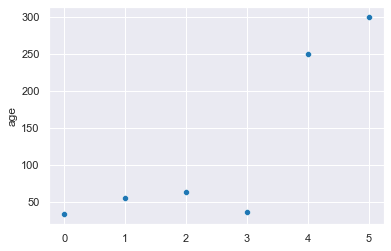

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context("notebook")

g= sns.scatterplot(x=dfs.index,
            y=dfs["age"],
            data=dfs)

In [25]:
dfs.loc[dfs['age']>100,'age']= 65
dfs

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33.0
1,Jane,Doe,JaneDoe@email.com,55.0
2,John,Doe,JohnDoe@email.com,63.0
3,Chris,Schafer,0,36.0
4,0,0,0,65.0
5,0,0,Anonymous@email.com,65.0
